First 10 values of Δθ(t):
t=0: delta_theta = [0. 0.]
t=1: delta_theta = [0. 0.]
t=2: delta_theta = [0. 0.]
t=3: delta_theta = [0. 0.]
t=4: delta_theta = [0. 0.]
t=5: delta_theta = [0. 0.]
t=6: delta_theta = [0. 0.]
t=7: delta_theta = [0. 0.]
t=8: delta_theta = [0. 0.]
t=9: delta_theta = [0. 0.]


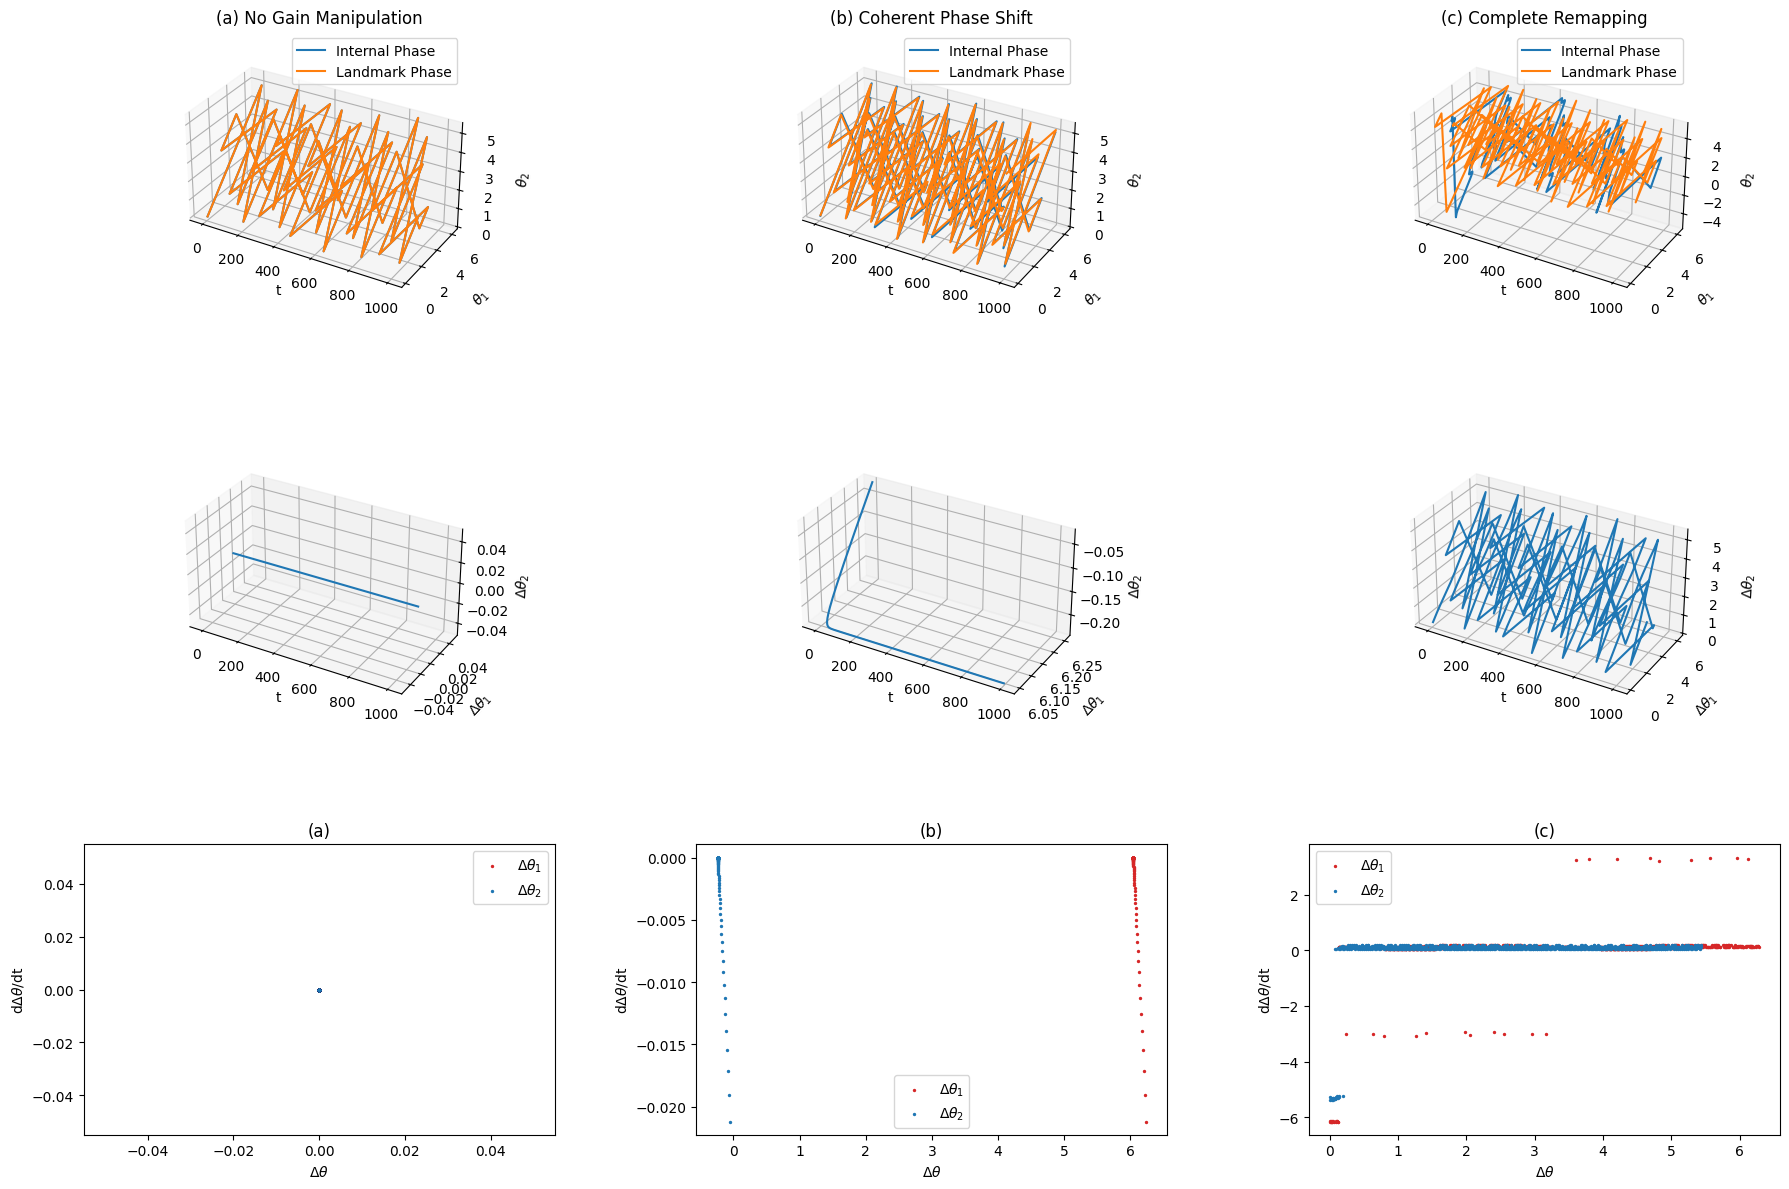

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def update_theta_period(theta):
    if abs(theta[1]) >= math.sqrt(3) * np.pi:
        theta -= np.floor(theta[1] / (math.sqrt(3) * np.pi)) * np.array([np.pi, math.sqrt(3) * np.pi])
    theta[0] = theta[0] % (2 * np.pi)
    return theta

def force_function(delta_theta):
    norm = np.linalg.norm(delta_theta)
    if norm < np.pi:
        return -np.sin(norm) * (delta_theta / norm) if norm != 0 else -delta_theta
    else:
        return np.zeros_like(delta_theta)

def simulate_2d_attractor(
    gain=1.0,
    v_vec=np.array([3.0, 3.0]),
    grid_spacing=200,
    locomotor_strength=0.5,
    omega=0.1,
    dt=1.0,
    T=1000
):
    theta_A = np.zeros(2)
    theta_L = np.zeros(2)

    theta_A_t, theta_L_t, delta_theta_t = [], [], []

    k0 = np.array([2 * np.pi / grid_spacing] * 2)
    k_L = gain * k0
    k_A = k0 * (1 + (gain - 1) * (1 - locomotor_strength))

    for _ in range(T):
        # theta_L += dt * k_L * v_vec
        # delta_for_force = wrap_delta_theta(theta_A - theta_L)
        # theta_A += dt * (k_A * v_vec + omega * force_function(delta_for_force))

        # # theta_A += dt * (k_A * v_vec + omega * force_function(theta_A - theta_L))

        # theta_L_wrapped = update_theta_period(theta_L.copy())
        # theta_A_wrapped = update_theta_period(theta_A.copy())
        # # delta_wrapped = update_theta_period(theta_A - theta_L)
        # delta_wrapped = wrap_delta_theta(theta_A - theta_L)

        # theta_A_t.append(theta_A_wrapped)
        # theta_L_t.append(theta_L_wrapped)
        # delta_theta_t.append(delta_wrapped)

        delta = (theta_A - theta_L + np.pi) % (2 * np.pi) - np.pi  # wrap difference
        theta_L += dt * k_L * v_vec
        theta_A += dt * (k_A * v_vec + omega * force_function(delta))
        # theta_A += dt * (k_A * v_vec + omega * force_function(theta_A - theta_L))

        theta_L_wrapped = update_theta_period(theta_L.copy())
        theta_A_wrapped = update_theta_period(theta_A.copy())
        delta_wrapped = update_theta_period(theta_A - theta_L)

        theta_A_t.append(theta_A_wrapped)
        theta_L_t.append(theta_L_wrapped)
        delta_theta_t.append(delta_wrapped)
        
    return np.array(theta_A_t), np.array(theta_L_t), np.array(delta_theta_t)

gains = [1, 1.5, -1.7]
results = [simulate_2d_attractor(gain=g) for g in gains]

# explore delta_theta
theta_A, theta_L, delta_theta = simulate_2d_attractor(gain=1.0)
print("First 10 values of Δθ(t):")
for i in range(10):
    print(f"t={i}: delta_theta = {delta_theta[i]}")


fig = plt.figure(figsize=(18, 12))

axs_2d = []
for i in range(3):
    ax = fig.add_subplot(3, 3, 7+i)
    axs_2d.append(ax)

axs_3d = np.empty((2, 3), dtype=object)
for row in range(2):
    for col in range(3):
        ax = fig.add_subplot(3, 3, row*3 + col + 1, projection='3d')
        ax.set_box_aspect([2, 1, 1])  
        axs_3d[row, col] = ax

for idx, (theta_A, theta_L, delta_theta) in enumerate(results):
    T = len(theta_A)
    time = np.arange(T)
    
    ax1 = axs_3d[0, idx]
    ax1.plot(time, theta_A[:, 0], theta_A[:, 1], label="Internal Phase", color='tab:blue')
    ax1.plot(time, theta_L[:, 0], theta_L[:, 1], label="Landmark Phase", color='tab:orange')
    ax1.set_title(['(a) No Gain Manipulation', '(b) Coherent Phase Shift', '(c) Complete Remapping'][idx])
    ax1.set_xlabel("t")
    ax1.set_ylabel(r"$\theta_1$")
    ax1.set_zlabel(r"$\theta_2$")
    ax1.legend()
    
    ax1.view_init(elev=30, azim=-60) 
    
    ax2 = axs_3d[1, idx]
    ax2.plot(time, delta_theta[:, 0], delta_theta[:, 1], color='tab:blue')
    ax2.set_xlabel("t")
    ax2.set_ylabel(r"$\Delta\theta_1$")
    ax2.set_zlabel(r"$\Delta\theta_2$")
    
    ax2.view_init(elev=30, azim=-60)
    
    ddelta_dt = np.diff(delta_theta, axis=0)
    axs_2d[idx].scatter(delta_theta[1:, 0], ddelta_dt[:, 0], color='tab:red', s=2, label=r"$\Delta\theta_1$")
    axs_2d[idx].scatter(delta_theta[1:, 1], ddelta_dt[:, 1], color='tab:blue', s=2, label=r"$\Delta\theta_2$")
    axs_2d[idx].set_xlabel(r"$\Delta\theta$")
    axs_2d[idx].set_ylabel(r"d$\Delta\theta$/dt")
    axs_2d[idx].set_title(['(a)', '(b)', '(c)'][idx])
    axs_2d[idx].legend()

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()


Fixed Plots for Visualization

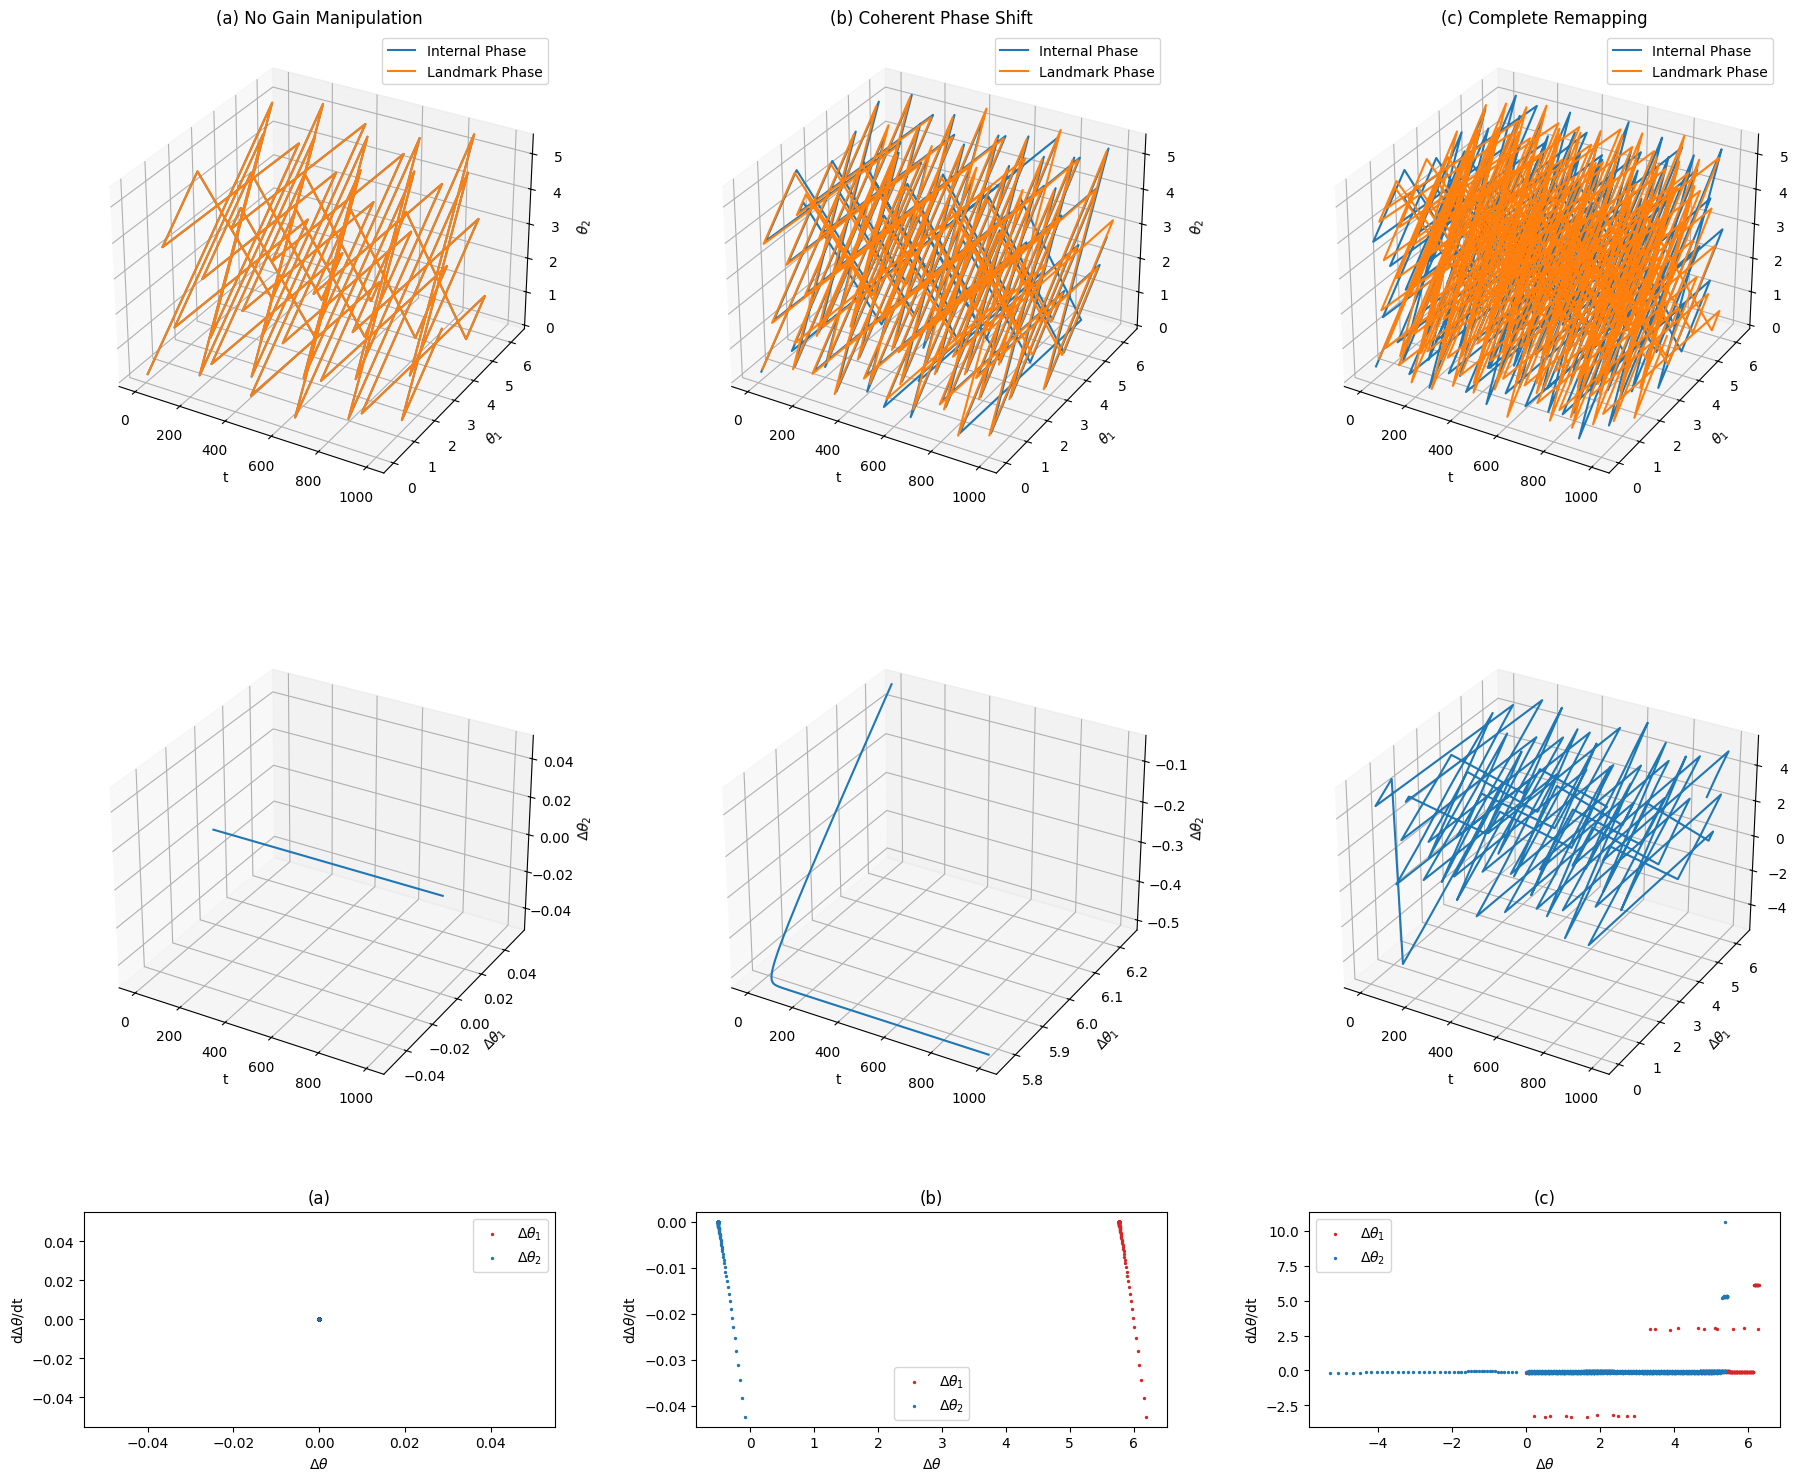

In [49]:

def update_theta_period(theta):
    if abs(theta[1]) >= math.sqrt(3) * np.pi:
        theta -= np.floor(theta[1] / (math.sqrt(3) * np.pi)) * np.array([np.pi, math.sqrt(3) * np.pi])
    theta[0] = theta[0] % (2 * np.pi)
    return theta

def wrap_delta_theta(delta_theta):
    return (delta_theta + np.pi) % (2 * np.pi) - np.pi

def force_function(delta_theta):
    norm = np.linalg.norm(delta_theta)
    if norm < np.pi:
        return -np.sin(norm) * (delta_theta / norm) if norm != 0 else -delta_theta
    else:
        return np.zeros_like(delta_theta)

def simulate_2d_attractor(
    gain=1.0,
    v_vec=np.array([3.0, 3.0]),
    grid_spacing=200,
    locomotor_strength=0.5,
    omega=0.1,
    dt=1.0,
    T=1000
):
    theta_A = np.zeros(2)
    theta_L = np.zeros(2)

    theta_A_t, theta_L_t, delta_theta_t = [], [], []

    k0 = np.array([2 * np.pi / grid_spacing] * 2)
    k_L = gain * k0
    k_A = k0 * (1 + (gain - 1) * (1 - locomotor_strength))

    for _ in range(T):
        delta = (theta_A - theta_L + np.pi) % (2 * np.pi) - np.pi  # wrap difference
        theta_L += dt * k_L * v_vec
        theta_A += dt * (k_A * v_vec + omega * force_function(delta))
        # theta_A += dt * (k_A * v_vec + omega * force_function(theta_A - theta_L))

        theta_L_wrapped = update_theta_period(theta_L.copy())
        theta_A_wrapped = update_theta_period(theta_A.copy())
        delta_wrapped = update_theta_period(theta_A - theta_L)

        theta_A_t.append(theta_A_wrapped)
        theta_L_t.append(theta_L_wrapped)
        delta_theta_t.append(delta_wrapped)

    return np.array(theta_A_t), np.array(theta_L_t), np.array(delta_theta_t)

gains = [1.0, 2, 4]
results = [simulate_2d_attractor(gain=g) for g in gains]

fig = plt.figure(figsize=(18, 15))

axs_2d = []
for i in range(3):
    ax = plt.subplot2grid((5, 3), (4, i), fig=fig)
    axs_2d.append(ax)

axs_3d = []
for row in range(2):
    row_axs = []
    for col in range(3):
        # Position each 3D plot to take 2 rows of height
        ax = plt.subplot2grid((5, 3), (row*2, col), rowspan=2, fig=fig, projection='3d')
        row_axs.append(ax)
    axs_3d.append(row_axs)
axs_3d = np.array(axs_3d)

for idx, (theta_A, theta_L, delta_theta) in enumerate(results):
    T = len(theta_A)
    time = np.arange(T)
    
    ax1 = axs_3d[0, idx]
    ax1.plot(time, theta_A[:, 0], theta_A[:, 1], label="Internal Phase", color='tab:blue')
    ax1.plot(time, theta_L[:, 0], theta_L[:, 1], label="Landmark Phase", color='tab:orange')
    ax1.set_title(['(a) No Gain Manipulation', '(b) Coherent Phase Shift', '(c) Complete Remapping'][idx])
    ax1.set_xlabel("t")
    ax1.set_ylabel(r"$\theta_1$")
    ax1.set_zlabel(r"$\theta_2$")
    ax1.legend()
    
    ax2 = axs_3d[1, idx]
    ax2.plot(time, delta_theta[:, 0], delta_theta[:, 1], color='tab:blue')
    ax2.set_xlabel("t")
    ax2.set_ylabel(r"$\Delta\theta_1$")
    ax2.set_zlabel(r"$\Delta\theta_2$")

    ddelta_dt = np.diff(delta_theta, axis=0)
    axs_2d[idx].scatter(delta_theta[1:, 0], ddelta_dt[:, 0], color='tab:red', s=2, label=r"$\Delta\theta_1$")
    axs_2d[idx].scatter(delta_theta[1:, 1], ddelta_dt[:, 1], color='tab:blue', s=2, label=r"$\Delta\theta_2$")
    axs_2d[idx].set_xlabel(r"$\Delta\theta$")
    axs_2d[idx].set_ylabel(r"d$\Delta\theta$/dt")
    axs_2d[idx].set_title(['(a)', '(b)', '(c)'][idx])
    axs_2d[idx].legend()

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

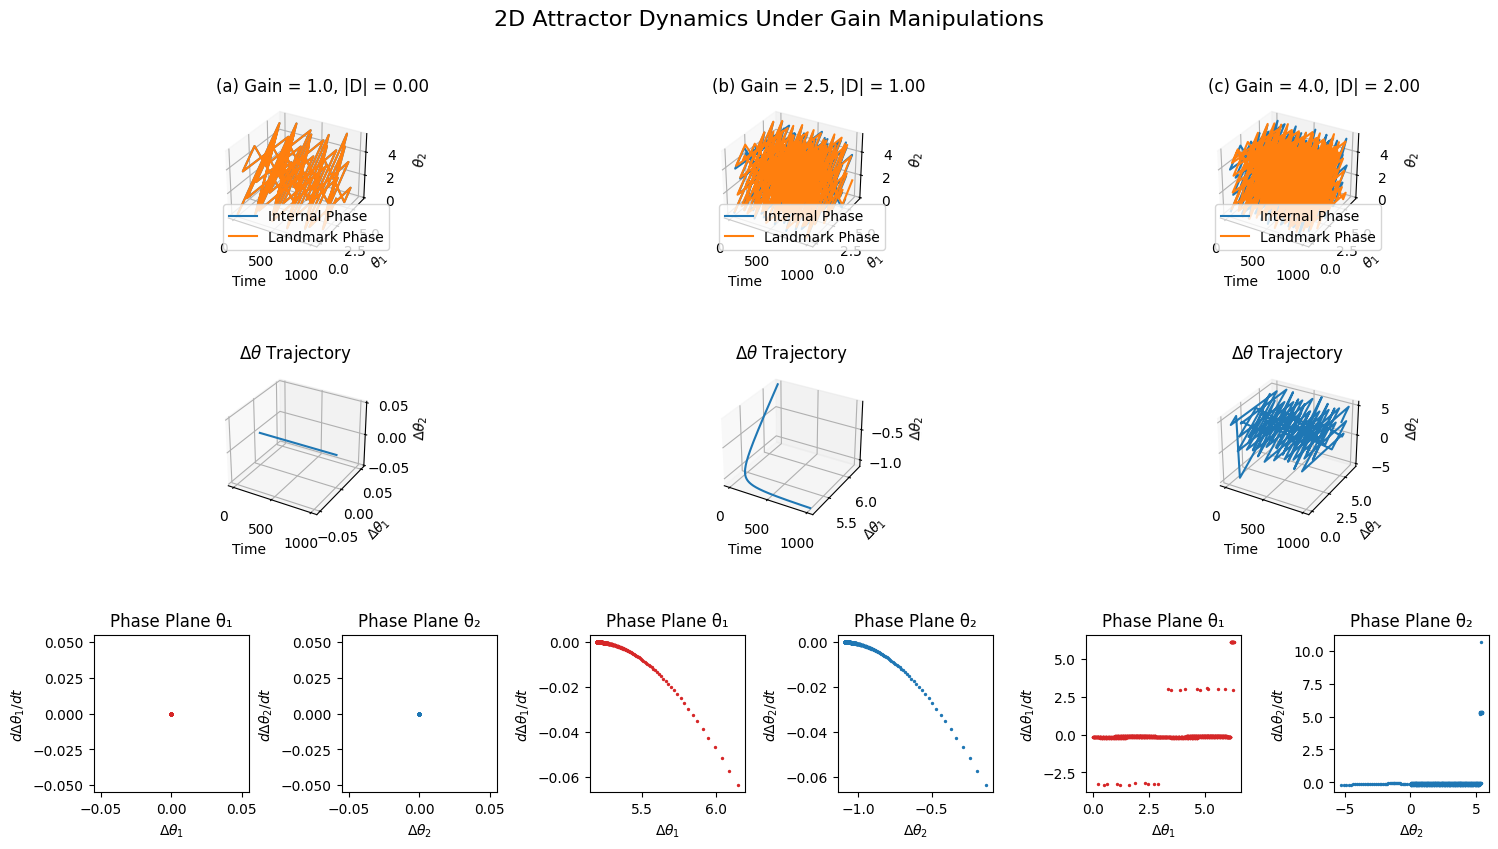

In [44]:
def update_theta_period(theta):
    if abs(theta[1]) >= math.sqrt(3) * np.pi:
        theta -= np.floor(theta[1] / (math.sqrt(3) * np.pi)) * np.array([np.pi, math.sqrt(3) * np.pi])
    theta[0] = theta[0] % (2 * np.pi)
    return theta

def wrap_delta_theta(delta_theta):
    return (delta_theta + np.pi) % (2 * np.pi) - np.pi

def force_function(delta_theta):
    norm = np.linalg.norm(delta_theta)
    if norm < np.pi:
        return -np.sin(norm) * (delta_theta / norm) if norm != 0 else np.zeros_like(delta_theta)
    else:
        return np.zeros_like(delta_theta)

def simulate_2d_attractor(
    gain=1.0,
    v_vec=np.array([3.0, 3.0]),
    grid_spacing=200,
    locomotor_strength=0.5,
    omega=0.1,
    dt=1.0,
    T=1000
):
    theta_A = np.zeros(2)
    theta_L = np.zeros(2)

    theta_A_t, theta_L_t, delta_theta_t = [], [], []

    k0 = np.array([2 * np.pi / grid_spacing] * 2)
    k_L = gain * k0
    k_A = k0 * (1 + (gain - 1) * (1 - locomotor_strength))

    for _ in range(T):
        delta = wrap_delta_theta(theta_A - theta_L) 
        theta_L += dt * k_L * v_vec
        theta_A += dt * (k_A * v_vec + omega * force_function(delta))

        theta_L_wrapped = update_theta_period(theta_L.copy())
        theta_A_wrapped = update_theta_period(theta_A.copy())
        delta_wrapped = update_theta_period(theta_A - theta_L)

        theta_A_t.append(theta_A_wrapped)
        theta_L_t.append(theta_L_wrapped)
        delta_theta_t.append(delta_wrapped)

    D_vec = (k_A - k_L) * v_vec / omega
    D_mag = np.linalg.norm(D_vec)

    return np.array(theta_A_t), np.array(theta_L_t), np.array(delta_theta_t), D_mag


gains = [1.0, 2.5, 4.0]
results = [simulate_2d_attractor(gain=g) for g in gains]

fig = plt.figure(figsize=(18, 9))
grid = plt.GridSpec(3, 6, wspace=0.6, hspace=0.7)

for idx, (g, (theta_A, theta_L, delta_theta, D_mag)) in enumerate(zip(gains, results)):
    time = np.arange(len(theta_A))

    ax1 = fig.add_subplot(grid[0, idx*2:idx*2+2], projection='3d')
    ax1.plot(time, theta_A[:, 0], theta_A[:, 1], label="Internal Phase", color='tab:blue')
    ax1.plot(time, theta_L[:, 0], theta_L[:, 1], label="Landmark Phase", color='tab:orange')
    ax1.set_title(f"({chr(97+idx)}) Gain = {g}, |D| = {D_mag:.2f}", loc='left')
    ax1.set_xlabel("Time")
    ax1.set_ylabel(r"$\theta_1$")
    ax1.set_zlabel(r"$\theta_2$")
    ax1.legend()

    ax2 = fig.add_subplot(grid[1, idx*2:idx*2+2], projection='3d')
    ax2.plot(time, delta_theta[:, 0], delta_theta[:, 1], color='tab:blue')
    ax2.set_title(r"$\Delta \theta$ Trajectory")
    ax2.set_xlabel("Time")
    ax2.set_ylabel(r"$\Delta\theta_1$")
    ax2.set_zlabel(r"$\Delta\theta_2$")

    ddelta_dt = np.diff(delta_theta, axis=0)
    ax3a = fig.add_subplot(grid[2, idx*2])
    ax3a.scatter(delta_theta[1:, 0], ddelta_dt[:, 0], color='tab:red', s=2)
    ax3a.set_xlabel(r"$\Delta \theta_1$")
    ax3a.set_ylabel(r"$d\Delta\theta_1/dt$")
    ax3a.set_title("Phase Plane θ₁")

    ax3b = fig.add_subplot(grid[2, idx*2+1])
    ax3b.scatter(delta_theta[1:, 1], ddelta_dt[:, 1], color='tab:blue', s=2)
    ax3b.set_xlabel(r"$\Delta \theta_2$")
    ax3b.set_ylabel(r"$d\Delta\theta_2/dt$")
    ax3b.set_title("Phase Plane θ₂")

plt.suptitle("2D Attractor Dynamics Under Gain Manipulations", fontsize=16)
plt.show()
